Metodo explicito

In [34]:
import numpy as np
import copy
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,20))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=22)
np.set_printoptions(linewidth=150)
deltat=5
Largobarra=10  #[cm]
nx=5
deltax=Largobarra/(nx)
x=np.linspace(0,Largobarra,nx+1)
deltax=Largobarra/(nx)
Ta=100
Tb=50
K=0.835   # constante que depende del material[cm^2/2] 
M=np.eye(nx+1,nx+1) # en realidad M debe ser de Nx x Nx
Lambda=K*deltat/(deltax**2)  #dependiendo de este valor el problema podra converger y ser estable , ver teorica
T=np.zeros([nx+1,1])
Tsiguiente=([nx+1,1])
tolerancia=0.02
T[0]=Ta
T[-1]=Tb

In [35]:
for i in range(1,nx):
    M[i,i-1]=Lambda
    M[i,i]=-2*Lambda+1
    M[i,i+1]=Lambda
        

In [36]:
MatrizT=np.zeros((nx+1,1)) #contiene todas la Temperaturas, cada columna es la T a un delta t apartado.
MatrizT[0]=Ta
MatrizT[-1]=Tb
Tsiguiente=np.matmul(M,T)
MatrizT=np.concatenate((MatrizT,Tsiguiente),1)
#mdf_comment este primer caso me da infinito !


In [37]:
Tsiguiente

array([[100.    ],
       [104.375 ],
       [  0.    ],
       [  0.    ],
       [ 52.1875],
       [ 50.    ]])

In [38]:
import pdb

In [40]:
#https://mdforti.github.io/Modelizacion/Ingenieria2019/Clases/Ej2Guia2/index.html
dif=abs(np.linalg.norm(T)-np.linalg.norm(Tsiguiente))
#mdf_comment este primer caso me da infinito !
n=0
    #mdf_comment en este caso, como sabes que puede diverge, te conviene poner una condicion de seguridad:
while dif>tolerancia and all(Tsiguiente<1000): #condicion de convergencia en tiempo
    T=copy.copy(Tsiguiente)
    T[0]=Ta
    T[-1]=Tb
    Tsiguiente=np.matmul(M,T)
    MatrizT=np.concatenate((MatrizT,Tsiguiente),1)
    dif=abs(np.linalg.norm(T)-np.linalg.norm(Tsiguiente))
    n=n+1 # para contar los pasos hasta el equilibrio 
    

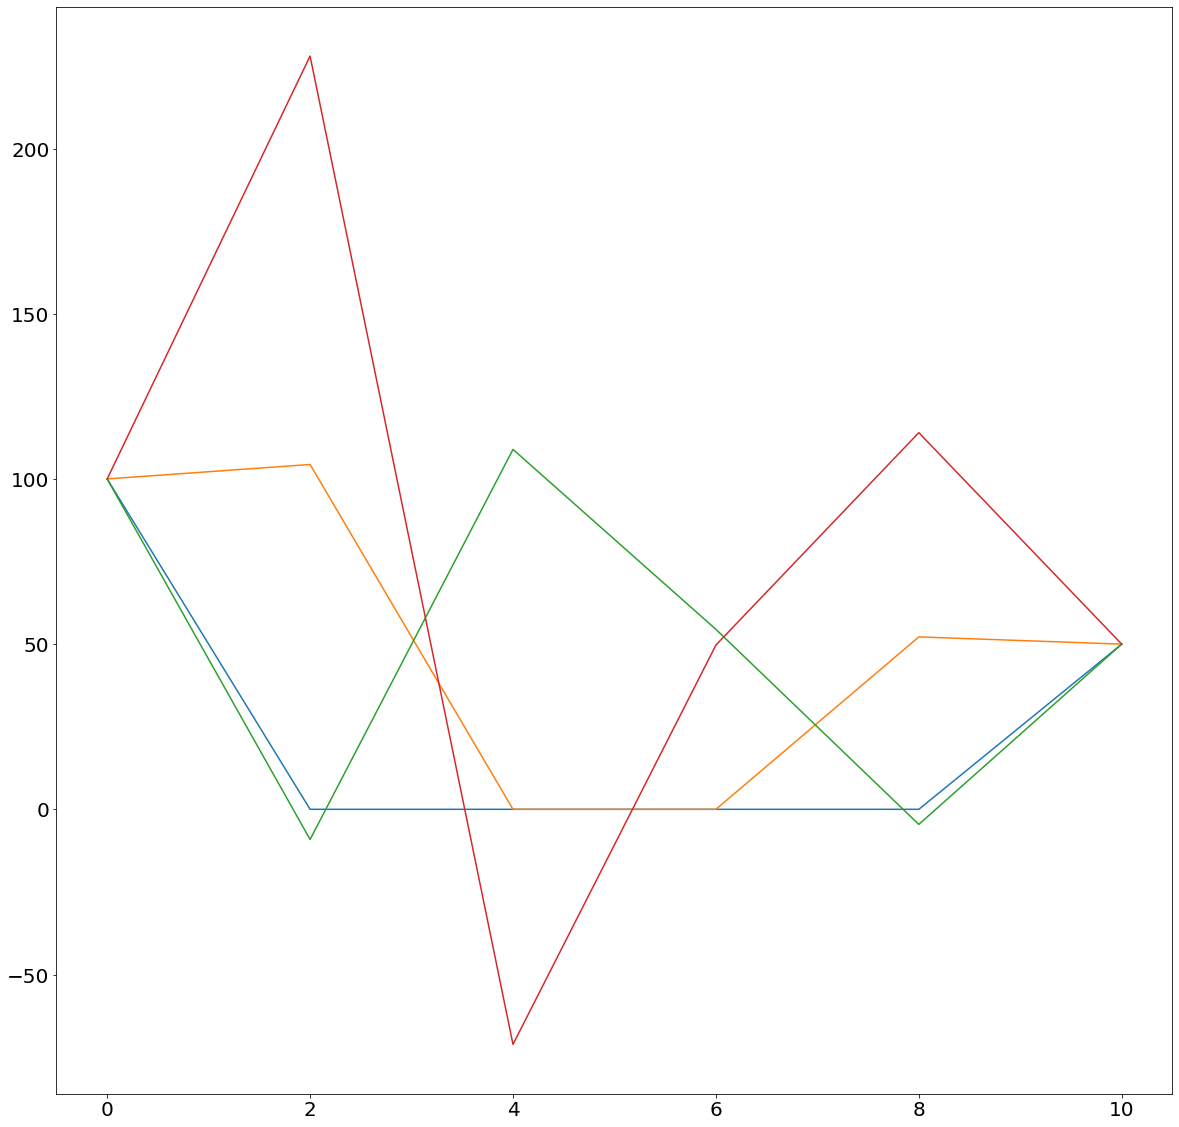

In [41]:
for j in range(0,n+1):
    plt.plot(x,MatrizT[:,j])

Metodo Crank-Nicolson

In [42]:
M1=np.eye(nx+1,nx+1) #los nombres M1,M2 y A estan segun tus apuntes
M2=np.eye(nx+1,nx+1)
for i in range(1,nx):
    M1[i,i-1]=-Lambda
    M1[i,i]=2*(1+Lambda)
    M1[i,i+1]=-Lambda
    
    M2[i,i-1]=Lambda
    M2[i,i]=2*(1-Lambda)
    M2[i,i+1]=Lambda
A=np.matmul(np.linalg.inv(M2),M1)

In [43]:
MatrizT2=[]
T2=np.zeros((nx+1,1))       #vector de carga
T2[0]=Ta
T2[-1]=Tb
MatrizT2=T2
Tsiguiente2=np.linalg.solve(A,T2)
dif2=abs(np.linalg.norm(T2)-np.linalg.norm(Tsiguiente2))
n2=0

In [44]:
while dif2>tolerancia:
    T2=copy.copy(Tsiguiente2)
    T2[0]=Ta
    T2[-1]=Tb
    Tsiguiente2=np.linalg.solve(A,T2)
    MatrizT2=np.concatenate((MatrizT2,Tsiguiente2),1)
    dif2=abs(np.linalg.norm(T2)-np.linalg.norm(Tsiguiente2))
    n2=n2+1 # contador


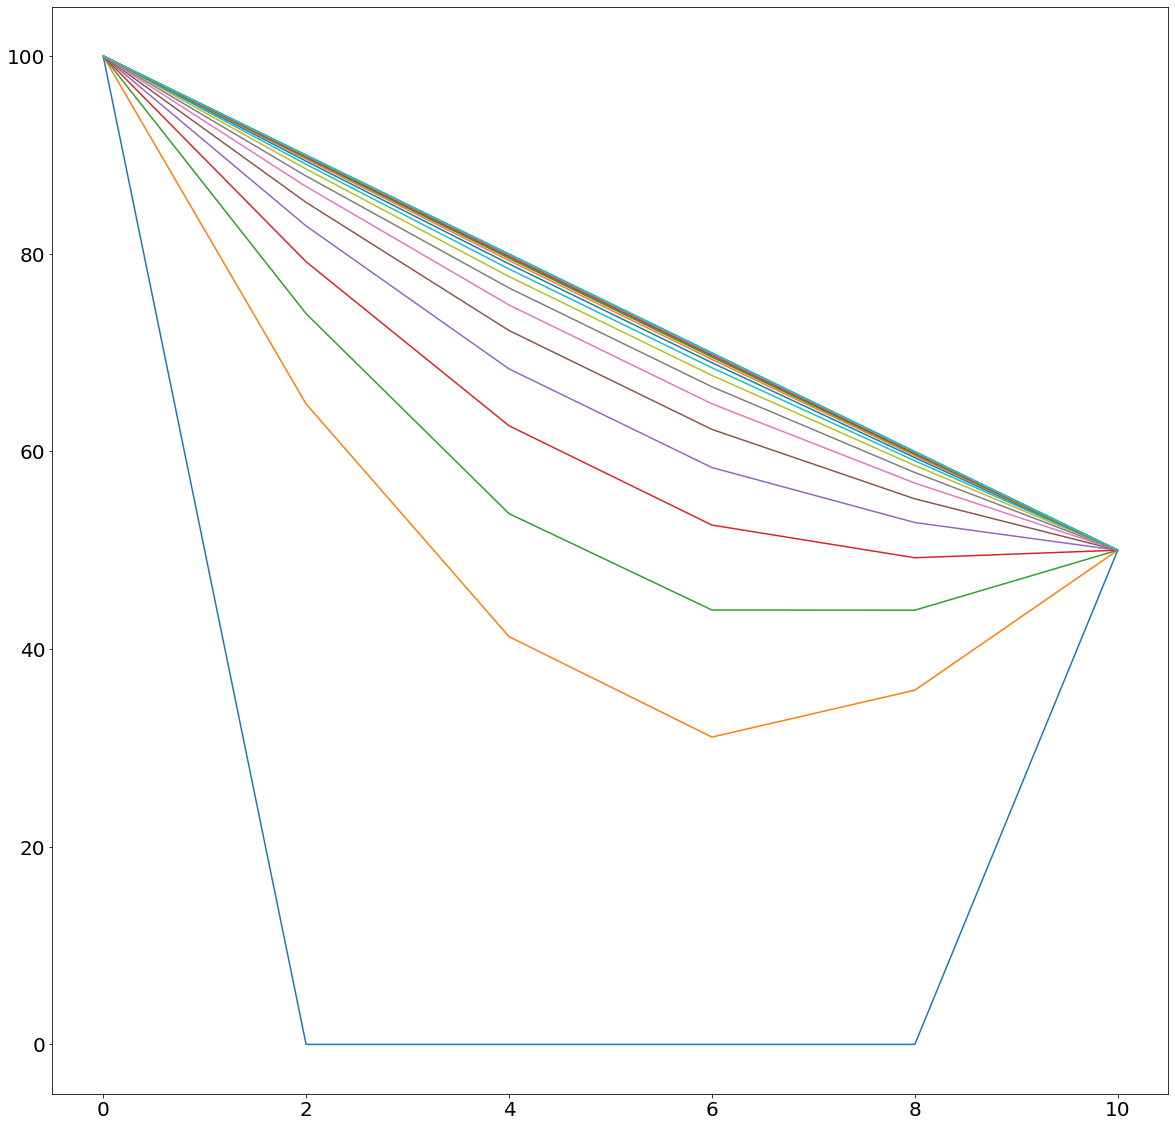

In [45]:
for j in range(0,n2+1):
    plt.plot(x,MatrizT2[:,j])

In [46]:
Lambda

1.04375